# Classification and Logistic Regression

## Linear v.s. Logistic Regression

- Linear regression: a linear and parametric model for regression problems.
- Logistic regression: a linear and parametric model for classification problems.

## Parametric Regression Model:

- Assumption of Functional Form
    - The model assumes a specific mathematical equation (e.g., linear, polynomial).
	- Example: In linear regression, the model assumes the form:
      $Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_nX_n + \epsilon$<br>
      where $\beta_i$ are the parameters and $\epsilon$ is the error term.
- Fixed Number of Parameters
- The complexity of the model is determined by a fixed set of parameters, regardless of the amount of training data.
- Efficient Learning
- Because the model structure is predefined, training parametric models is often computationally efficient.
- Interpretability
- Many parametric models (like linear regression) offer interpretability, allowing us to understand how each feature influences the prediction.
- A model that summarizes data with a finite set of parameters.
- Make assumptions on data distributions.
    - E.g. linear/logistic regression, neural networks

## Non-parametric models:
- A model that cannot be characterized by a bounded set of parameters.
- No assumptions on data distributions.
    - E.g. instance-based learning that generate hypotheses using training
- Examples: kNN and decision trees

## Logistic (Sigmoid) Function

$$f(x) = \frac{1}{1 + e^{-x}}$$

Its derivative is:
$$f'(x) = f(x)(1 - f(x))$$

It shows that:
- The derivative at any point depends on the function's value at that point
- When f(x) is close to 0 or 1, the derivative becomes very small
- The derivative is largest when f(x) = 0.5 (middle of the sigmoid curve)

This property makes sigmoid useful in machine learning because:

- It `squashes` input values into the range [0,1]
- The derivative is easy to compute (just multiply the output by 1 minus itself)
- The small derivatives near 0 and 1 help prevent extreme weight updates

In [1]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    fx = sigmoid(x)
    return fx * (1 - fx)      

## Multivariate sigmoid function

$$ f(x, y) = \frac{1}{1 + e^{-(ax + by + c)}} $$

where $a$, $b$, and $c$ are constants that define the shape of the sigmoid surface.

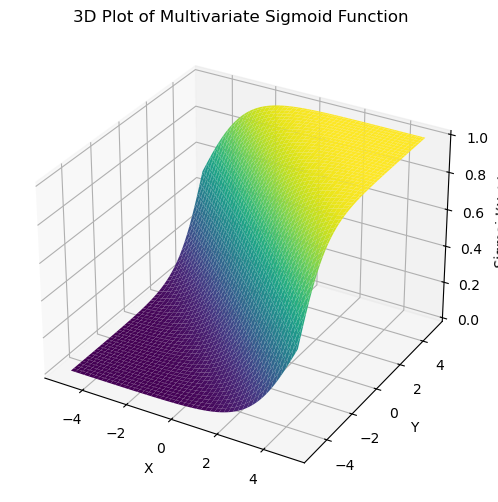

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the sigmoid function for two variables
def sigmoid(x, y, a=1, b=1, c=0):
    return 1 / (1 + np.exp(-(a*x + b*y + c)))

# Generate grid points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = sigmoid(X, Y)

# Plot the surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Sigmoid(X, Y)')
ax.set_title('3D Plot of Multivariate Sigmoid Function')

plt.show()  

"""
Meshgrid is created for values of x and y.
- Z values are computed using the sigmoid function.
- The function is plotted in 3D using plot_surface() with the viridis colormap.
"""

## Cross-Entropy Method

Cross-entropy is a measure of the difference between two probability distributions. In machine learning, it's commonly used as a loss function, especially for classification problems.

Key concepts:

### Basic Formula

$H(p,q) = -\sum_x p(x)\log(q(x))$

Where:
- $p(x)$ is the true probability distribution (ground truth)
- $q(x)$ is the predicted probability distribution
- $\sum_x$ means sum over all possible values of x

### Binary Cross-Entropy (for binary classification):

$H(y,\hat{y}) = -[y\log(\hat{y}) + (1-y)\log(1-\hat{y})]$

Where:
- $y$ is the true label (0 or 1)
- $\hat{y}$ is the predicted probability


```python
def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
```

### Properties
- Always non-negative
- Equals zero when predictions perfectly match true distribution
- Larger values indicate worse predictions
- Penalizes confident wrong predictions more heavily

Cross-entropy is particularly useful in classification because it:
- Provides stronger gradients than mean squared error
- Works well with probability outputs (like sigmoid or softmax)
- Penalizes overconfident wrong predictions

## Classification Models

### Simple Models:

#### Perceptron
A perceptron is a type of binary classifier that determines whether an input belongs to one of two possible classes. It does this by computing a weighted sum of the input features and passing it through an activation function.

#### A perceptron consists of:

1.	Inputs (features): $x_1, x_2, …, x_n$
2.	Weights: $w_1, w_2, …, w_n$ (learned during training)
3.	Bias (b): Adjusts the decision boundary
4.	Summation function: Computes $z = \sum w_i x_i + b$
5.	Activation function: Typically a step function that outputs:
	- $1$ if $z \geq 0$ (one class)
    - $0$ if $z < 0$ (another class)

#### Mathematical Representation

$y = f\left(\sum_{i=1}^{n} w_i x_i + b \right)$

where f(z) is the activation function (commonly the step function or sign function).

#### Perceptron Learning Algorithm

1.	Initialize weights and bias randomly.
2.	For each training sample:
    - Compute the output using the weighted sum and activation function.
	- Compare with the actual label and update weights using:
      $w_i = w_i + \eta (y_{\text{true}} - y_{\text{pred}}) x_i$
	- Adjust bias similarly.
3.	Repeat until the classification is correct or a stopping criterion is met.

#### Limitations
- A perceptron can only classify linearly separable data (e.g., AND, OR logic gates).
- It cannot solve problems like XOR, which require multiple layers.

#### Multi-Layer Perceptron (MLP)

To overcome the limitation of linear separability, multiple perceptrons are stacked into a Multi-Layer Perceptron (MLP), which uses non-linear activation functions like sigmoid, ReLU, or tanh.

### Example: AND Gate Classification Using a Perceptron

We will train a perceptron to mimic the behavior of the logical AND gate.

### Dataset (AND Gate)

|   Input $x_1$  |   Input $x_2$  |   Output $y$  |
|:------------:|:------------:|:-----------:|
|   0          |   0          |   0         |
|   0          |   1          |   0         |
|   1          |   0          |   0         |
|   1          |   1          |   1         |

The perceptron should learn a function that correctly predicts the output.

### Perceptron Model

The perceptron follows this formula:

$y = f(w_1 x_1 + w_2 x_2 + b)$

where:
- $w_1$, $w_2$ are weights
- $b$ is bias
- $f(z)$ is the step activation function:
$$
f(z) =
\begin{cases}
1, & \text{if } z \geq 0 \\
0, & \text{if } z < 0
\end{cases}
$$

### Learning Algorithm

1.	Initialize weights $w_1$, $w_2$ and bias $b$ (e.g., small random values).
2.	For each training sample $(x_1, x_2, y)$:
    - Compute $z = w_1 x_1 + w_2 x_2 + b$
    - Apply the activation function to get $\hat{y}$ (prediction).
    - Update the weights if the prediction is incorrect using:
      $w_i = w_i + \eta (y_{\text{true}} - \hat{y}) x_i$<br>   
      where $\eta$ is the learning rate.
3.	Repeat until weights converge.

### Visualization of Decision Boundary

Let’s visualize a trained perceptron for the AND function.

1.	The perceptron finds a line that separates the data.
2.	Since AND is linearly separable, it can be solved using a perceptron.
3.	The decision boundary (learned by the perceptron) is a straight line.

<img src="images/perceptron.png" alt="Alt Text" width="300" height="200">

Here’s the visualization of a perceptron classifying the AND gate:
- Red circles (Class 0) represent points where the AND function outputs 0.
- Blue squares (Class 1) represent points where the AND function outputs 1.
- The dashed line is the decision boundary found by the perceptron.

Everything below the line is classified as 0, and everything above it is classified as 1. Since the AND function is linearly separable, a single-layer perceptron can classify it correctly.

### K-Nearest Neighbors (KNN) 

It is a non-parametric, instance-based learning method used for both __classification__ and __regression__ tasks.  It makes predictions based on the majority class (for classification) or the average (for regression) of its nearest neighbors.

#### Steps:

- Choose K: Select the number of nearest neighbors to consider.
- Compute Distance: Measure the distance between the new data point and all training data points using a metric like:
    - Euclidean Distance:
    $ d(A,B) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $
    - Manhattan Distance
    - Minkowski Distance
- Find the K Nearest Neighbors: Idetify the K points closest to the new data point.
- Make a Prediction:
    - Classification: Assign the most common class among the K neighbors (majority vote).
    - Regression: Predict the average of the values of K neighbors.

Imagine you have a dataset where you want to classify a new point as Red or Blue.

- If K = 3, we look at the 3 nearest neighbors.
- If 2 are Blue and 1 is Red, the new point is classified as Blue.

Advantages of KNN

- Simple and Easy to Implement
- No Training Needed (lazy learning)
- Works Well for Small Datasets
- Can be Used for Classification & Regression


Disadvantages of KNN

- Computationally Expensive (for large datasets, since distance calculation is required for every prediction)
- Sensitive to Irrelevant Features & Noise
- Choosing the Right K is Crucial

When to Use KNN
- When you have small to medium-sized datasets.
- When interpretability is important.
- When you need a simple baseline model before using complex ones.

How to choose K
- Small k -> small neighborhood -> high complexity -> may overfit
- Large k -> large neighborhood -> low complexity -> may underfit
- Practicians often choose k between 3 – 15, or k < 𝑁 (N is the number of training examples).
    

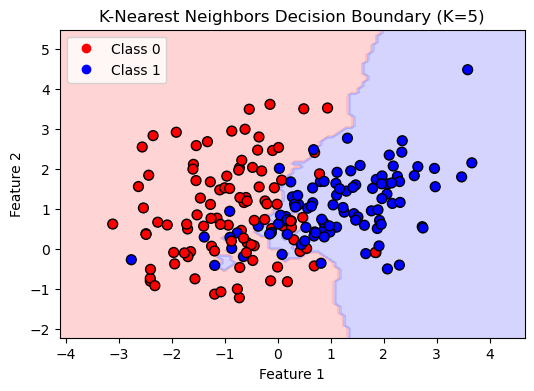

In [46]:
# Example implementation of KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap

# Generate a synthetic dataset
# n_features=2: We want 2 total features.
# n_informative=2: Both features provide useful information.
# n_redundant=0: No redundant features.
# n_clusters_per_class=1: Each class has a single cluster.
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=42)
# Train a KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Create a mesh grid for decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(6, 4))
cmap_light = ListedColormap(["#FFAAAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#0000FF"])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)

# Plot data points
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=50)
plt.legend(handles=scatter.legend_elements()[0], labels=["Class 0", "Class 1"])

# Labels
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Nearest Neighbors Decision Boundary (K=5)")
plt.show()

# Explanation of the plot of KNN below:
# Red & Blue regions: Decision boundary for two classes.
# Points with different colors: Data points belonging to different classes.
# Smooth boundary: KNN assigns class labels based on the majority of K neighbors.

Decision Tree

Complex Models:

Support Vector Machine

(Deep) Neural Network
Ensemble methods: Random Forest, Gradient Boosting Tree

### Confusion Matrix

It is used to evaluate the performance of a classification model.  It is a table that summerizes the predictions made by the model and compares them to the actual outcomes.

- True Positives (TP) : The number of instances correctly predicted as positive.
- True Negatives (TN) : The number of instances correctly predicted as negative.
- False Positives (FP) : The number of instances incorrectly predicted as positive (Type I error).
- False Negatives (FN) : The number of instances incorrectly predicted as negative (Type II error).

The confusion matrix helps in understanding how well the model is performing, especially in terms of distinguishing between different classes. It provides insights into the types of errors the model is making and can be used to calculate various performance metrics such as accuracy, precision, recall, and F1-score.



1. **Axes**:
   - **X-axis (Columns)**: Represents the predicted classes by the model.
   - **Y-axis (Rows)**: Represents the actual classes from the dataset.

2. **Structure**:
   - Each cell in the matrix shows the count of instances for a combination of actual and predicted classes.
   - The diagonal cells (from top-left to bottom-right) represent correct predictions.

4. **Interpretation**:
   - A high number of TP and TN indicates good model performance.
   - A high number of FP and FN suggests areas where the model is making errors.

In your code, the confusion matrix is visualized using a heatmap, which makes it easier to see the distribution of correct and incorrect predictions. The `annot=True` parameter ensures that the counts are displayed in each cell of the heatmap.
